<a href="https://colab.research.google.com/github/atharv946/Chromatin-Accessibility/blob/main/Step4a_CNN_trained_on_OHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

from keras import Sequential, Input

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.optimizers import Adam

from keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_train_random_1k.csv')
df_val = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_valid_random_1k.csv')

In [ ]:
df_train.head()

,signalValue,sequence,accessibility,accessibility.1
0,0.000000,AGATCCTGTGGTAGGAAGGACATTAGTGAGTATGAGGAATGGAAGA...,0.0,0.0
1,0.000000,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0.0,0.0
2,0.471098,CTTAGAGTATCCGGACTGACACATAGGGAGGAGTGGGCAGAATAGC...,1.0,1.0
3,1.224850,GGTACAATAGTAAATAAGATAGGTAAGATAGTAACAGACTTAATGG...,1.0,1.0
4,4.020030,GAACCTGCTGAAATGCTGCAGGGATTTCAGGCAAGTTAGCCTTGGC...,1.0,1.0


In [ ]:
df_train.shape

(116532, 4)

In [ ]:
# Function to one-hot encode a sequence

def one_hot_encode(sequence, max_length):

    encoding = {'A': [1, 0, 0, 0],

                'C': [0, 1, 0, 0],

                'G': [0, 0, 1, 0],

                'T': [0, 0, 0, 1],

                'N': [0, 0, 0, 0]

                }

    # One-hot encode the sequence

    encoded_sequence = [encoding.get(base, [0, 0, 0, 0]) for base in sequence[:max_length]]

    # Pad to the maximum length by adding [0, 0, 0, 0] (which represents 'N' or padding)

    return pad_sequences([encoded_sequence], maxlen=max_length, dtype='int32', padding='post')[0]

In [ ]:
# Set the fixed sequence length
fixed_length = 1000

# One-hot encode all sequences in the DataFrame and truncate/pad to fixed length
X_train = np.array([one_hot_encode(seq, fixed_length) for seq in df_train['sequence']])

In [ ]:
y_train  = np.array(df_train['accessibility'])

In [ ]:
X_val = np.array([one_hot_encode(seq, fixed_length) for seq in df_val['sequence']])

In [ ]:
y_val = np.array(df_val['accessibility'])

X_train.shape[1:]

(1000, 4)

In [ ]:
# Build the CNN model
# ADD MORE LAYERS TO MAKE MORE DENSE, ADD MORE UNITS
model = Sequential()

model.add(Input(shape=(1000, 4, 1)))
model.add(Conv2D(filters=64, kernel_size=(13,4), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(13,1), activation='relu', padding='same'))

# model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=(fixed_length, 4)))
model.add(MaxPooling2D(pool_size=(5, 1)))

model.add(Conv2D(filters=64, kernel_size=(7,1), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(7,1), activation='relu', padding='same'))

#model.add(Conv2D(filters=256, kernel_size=(8,4), activation='relu', padding='same')) and
#model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(500, 2)))
# model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(500, 2)))
model.add(MaxPooling2D(pool_size=(5, 1)))

model.add(Conv2D(filters=64, kernel_size=(5,1), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 1)))


#model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

#model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

In [ ]:
model.summary()# Compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1000, 4, 64)         │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1000, 4, 64)         │          53,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 200, 4, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 200, 4, 64)          │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 200, 4, 64)          │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 4, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 40, 4, 64)           │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 4, 64)           │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,513 (1.10 MB)

 Trainable params: 288,513 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with validation
model_trained = model.fit(X_train, y_train, epochs=8, batch_size=2, validation_data=(X_val, y_val), verbose=1)

Epoch 1/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 244s 4ms/step - accuracy: 0.7462 - loss: 0.4875 - val_accuracy: 0.8787 - val_loss: 0.2848
Epoch 2/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 238s 4ms/step - accuracy: 0.8882 - loss: 0.2717 - val_accuracy: 0.9064 - val_loss: 0.2325
Epoch 3/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 236s 4ms/step - accuracy: 0.9087 - loss: 0.2263 - val_accuracy: 0.9167 - val_loss: 0.2062
Epoch 4/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 0.9237 - loss: 0.1960 - val_accuracy: 0.9200 - val_loss: 0.2123
Epoch 5/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 0.9334 - loss: 0.1739 - val_accuracy: 0.9206 - val_loss: 0.2048
Epoch 6/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 0.9416 - loss: 0.1559 - val_accuracy: 0.9176 - val_loss: 0.2119
Epoch 7/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 0.9478 - loss: 0.1435 - val_accuracy: 0.9141 - val_loss: 0.2164
Epoch 8/8
58266/58266 ━━━━━━━━━━━━━━━━━━━━ 237s 4ms/step - accuracy: 

In [ ]:
import matplotlib.pyplot as plt



def plot_history(model):

    # Plot training & validation accuracy values

    plt.figure(figsize=(14, 5))



    # Accuracy subplot

    plt.subplot(1, 2, 1)

    plt.plot(model.history['accuracy'], label='Train Accuracy')

    plt.plot(model.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Model Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.legend(loc='upper left')



    # Loss subplot

    plt.subplot(1, 2, 2)

    plt.plot(model.history['loss'], label='Train Loss')

    plt.plot(model.history['val_loss'], label='Validation Loss')

    plt.title('Model Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.legend(loc='upper left')



    plt.tight_layout()

    plt.show()

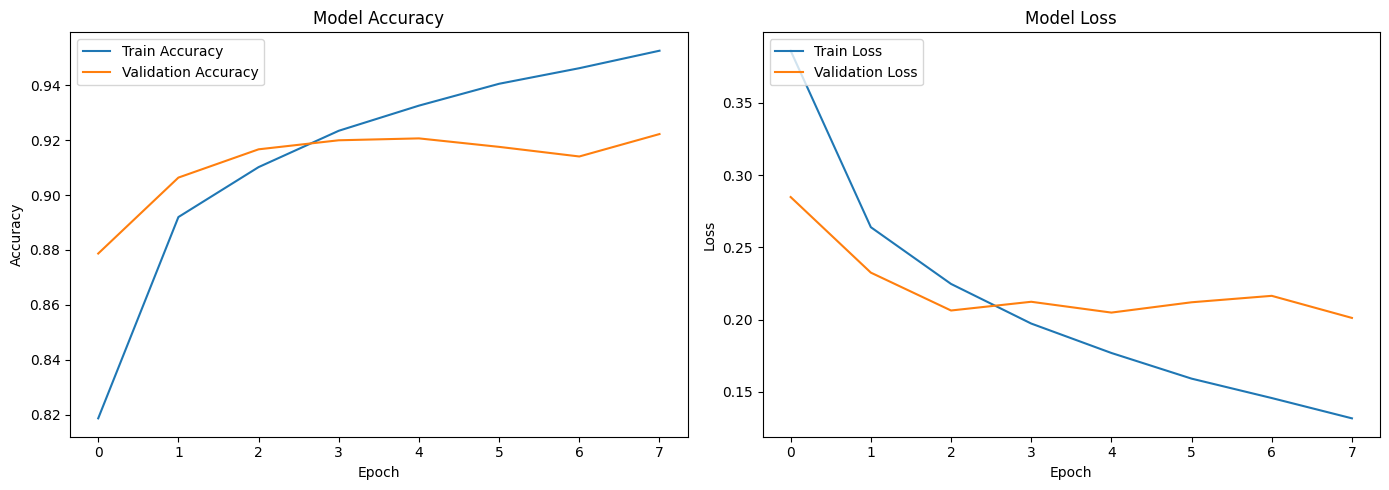

In [ ]:
plot_history(model_trained)


In [ ]:
# Evaluate the model on the test dataset

val_score = model.evaluate(X_val, y_val, verbose=1)

print(f'Accuracy on validation set: {val_score[1] * 100}%')

456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9207 - loss: 0.2035
Accuracy on validation set: 92.22214818000793%


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_test_random_1k.csv')
X_test = np.array([one_hot_encode(seq, fixed_length) for seq in df_test['sequence']])
y_test  = np.array(df_test['accessibility'])

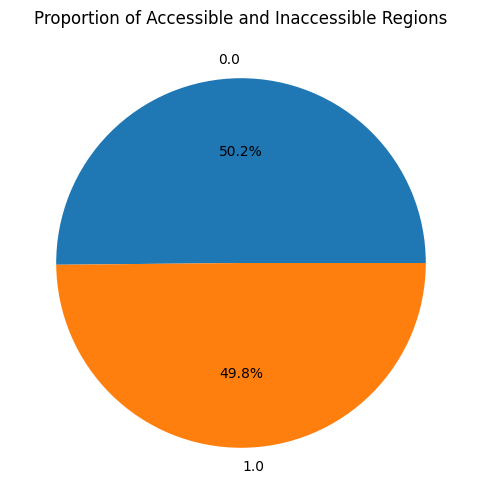

In [ ]:
import matplotlib.pyplot as plt

accessibility_counts = df_test['accessibility'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(accessibility_counts, labels=accessibility_counts.index, autopct='%1.1f%%')
_ = plt.title('Proportion of Accessible and Inaccessible Regions')

In [ ]:
test_accuracy = model.evaluate(X_test, y_test, verbose=1)

y_pred_probs = model.predict(X_test)

#y_pred = np.argmax(y_pred_probs, axis=-1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9233 - loss: 0.2016
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Classification Report:
              precision    recall  f1-score   support

Inaccessible       0.92      0.92      0.92      7306
  Accessible       0.92      0.92      0.92      7261

    accuracy                           0.92     14567
   macro avg       0.92      0.92      0.92     14567
weighted avg       0.92      0.92      0.92     14567



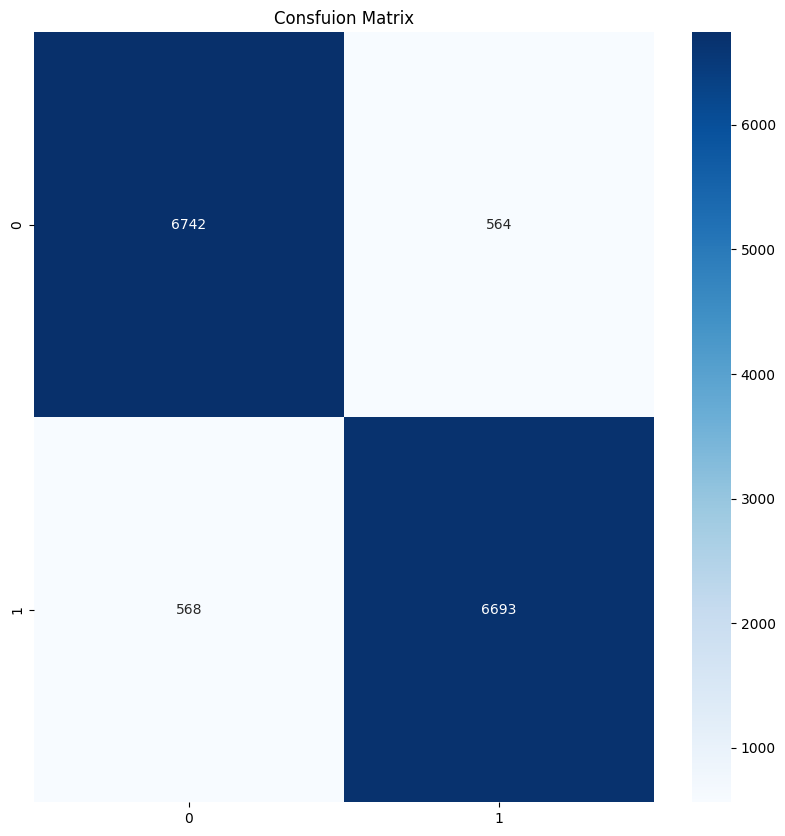

In [ ]:
# After finding optimized paramaters(learning rates and epochs) run this cell to save best model

model.save("/content/drive/MyDrive/1:1_Atharv_Gupta/Models/best_model_CNN.h5")


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate classification report
print("Classification Report:")
class_names = ['Inaccessible','Accessible']
print(classification_report(y_test, y_pred, target_names=class_names))
model_evaluation = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test, y_pred),  annot = True, fmt="g", cmap = "Blues")
plt.title("Consfuion Matrix")
plt.show()

In [ ]:
df_snps = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/baseline_snp_sequences.csv')
X_ref_snp = np.array([one_hot_encode(seq, fixed_length) for seq in df_snps['ref_sequence']])
X_alt_snp = np.array([one_hot_encode(seq, fixed_length) for seq in df_snps['alt_sequence']])
ref_pred_probs = model.predict(X_ref_snp)
alt_pred_probs = model.predict(X_alt_snp)

for i in range(len(ref_pred_probs)):
    c = ref_pred_probs[i] - alt_pred_probs[i]
    df_snps.loc[i, 'delta'] = c
    df_snps.loc[i, 'ref_pred'] = ref_pred_probs[i]
    df_snps.loc[i, 'alt_pred'] = alt_pred_probs[i]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
df_snps.head()
df_snps.to_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/baseline_snp_sequences.csv', index=False)

In [ ]:
df_snps = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/validation_snp_sequences.csv')
X_ref_snp = np.array([one_hot_encode(seq, fixed_length) for seq in df_snps['ref_sequence']])
X_alt_snp = np.array([one_hot_encode(seq, fixed_length) for seq in df_snps['alt_sequence']])
ref_pred_probs = model.predict(X_ref_snp)
alt_pred_probs = model.predict(X_ref_snp)

for i in range(len(ref_pred_probs)):
    c = ref_pred_probs[i] - alt_pred_probs[i]
    df_snps.loc[i, 'delta'] = c
    df_snps.loc[i, 'ref_pred'] = ref_pred_probs[i]
    df_snps.loc[i, 'alt_pred'] = alt_pred_probs[i]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
df_snps.head()

,Chromosome,SNP,Position,cytoBand,REF,ALT,Risk Allele,RAF,Func.refGene,Gene.refGene,Gene.ensGene,Source_2018NG,NewPosition,sequence,ref_sequence,alt_sequence,delta,ref_pred,alt_pred
0,1,rs56391074,88210715,1p22.3,A,AT,AT,0.3790,intergenic,LINC01364;PKN2-AS1,ENSG00000199318;ENSG00000224235,Novel,87745032,A,ATCACAAAAAGACATGGAAGCCAGGGGTTTTTGGGTAATCACACAC...,ATCACAAAAAGACATGGAAGCCAGGGGTTTTTGGGTAATCACACAC...,0.0,0.000037,0.000037
1,1,rs34579442,153899900,1q21.3,C,CT,CT,0.3360,intergenic,GATAD2B;DENND4B,ENSG00000143614;ENSG00000198837,Novel,153927424,C,AGTAGCTGGGATTATAGGCCCCCGCCACCACACCCATCTAATTTTT...,AGTAGCTGGGATTATAGGCCCCCGCCACCACACCCATCTAATTTTT...,0.0,0.000743,0.000743
2,1,rs17599629,150658287,1q21.3,A,G,G,0.2180,intronic,GOLPH3L,ENSG00000143457,Known,150685811,A,AACATTTGAACAAGAAAGATATGGATAAGACCTGAAAAATAACTCA...,AACATTTGAACAAGAAAGATATGGATAAGACCTGAAAAATAACTCA...,0.0,0.000999,0.000999
3,1,rs1218582,154834183,1q21.3,G,A,G,0.4467,intronic,KCNN3,ENSG00000143603,Known,154861707,G,GCCTCTCAAAGTGCTGCGATTACAGGTATGAGCCACCGCGCCTGGC...,GCCTCTCAAAGTGCTGCGATTACAGGTATGAGCCACCGCGCCTGGC...,0.0,0.995733,0.995733
4,1,rs4245739,204518842,1q32.1,C,A,A,0.7380,UTR3,MDM4,ENSG00000198625,Known,204549714,C,AAGTTAACCCATTCTCTCTCCACGTCTGATATCACTGCCATACCTG...,AAGTTAACCCATTCTCTCTCCACGTCTGATATCACTGCCATACCTG...,0.0,0.003138,0.003138
